# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [18]:
# Memuat dataset dari URL GitHub
url = "https://raw.githubusercontent.com/NaufalNurFahriza/machine-learning-pemula-dicoding/main/hasil_clustering.csv"
df = pd.read_csv(url)

# Menampilkan beberapa baris pertama dataset
df.head()

,length,weight,w_l_ratio,Cluster
0,-0.945026,-0.270714,0.553657,4
1,-1.475775,-0.445401,1.776943,2
2,-1.267721,-0.261009,1.287629,2
3,-1.382363,-0.358058,1.532286,2
4,-0.920966,-0.338648,0.472105,4


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [25]:
# Memisahkan fitur dan target
X = df.drop('Cluster', axis=1)
y = df['Cluster']

# Menampilkan jumlah data per cluster
cluster_counts = df['Cluster'].value_counts().sort_index()
print("Jumlah data per cluster:\n", cluster_counts)

# Membagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Menampilkan ukuran data latih dan data uji
print("Ukuran data latih:", X_train.shape)
print("Ukuran data uji:", X_test.shape)

Jumlah data per cluster:
 Cluster
0    930
1    427
2    454
3    403
4    471
5    406
6    434
Name: count, dtype: int64
Ukuran data latih: (2820, 3)
Ukuran data uji: (705, 3)


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

## Model 1: Logistic Regression

In [20]:
# Membangun model Logistic Regression
log_reg = LogisticRegression(max_iter=500)
log_reg.fit(X_train, y_train)
y_pred_logreg = log_reg.predict(X_test)

## Model 2: Random Forest

In [21]:
# Membangun model Random Forest
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)

Tulis narasi atau penjelasan algoritma yang Anda gunakan.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.


Evaluasi Logistic Regression:
Accuracy: 0.9787234042553191
F1-Score: 0.9785720206279627
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       167
           1       0.96      0.99      0.97        78
           2       0.93      0.99      0.96       113
           3       1.00      1.00      1.00        72
           4       0.99      0.90      0.94       106
           5       1.00      1.00      1.00        84
           6       1.00      0.98      0.99        85

    accuracy                           0.98       705
   macro avg       0.98      0.98      0.98       705
weighted avg       0.98      0.98      0.98       705


Evaluasi Random Forest:
Accuracy: 0.9943262411347518
F1-Score: 0.9943245429656725
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       167
           1       0.99      1.00      0.99        78
           2       0.98      0.99      0.99       113
           3  

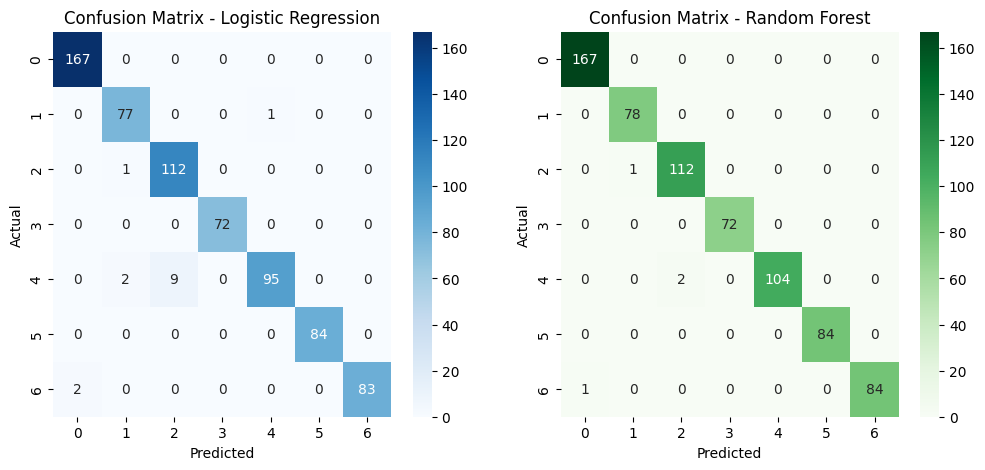

In [22]:
# Import library yang diperlukan untuk visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluasi model Logistic Regression
print("\nEvaluasi Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("F1-Score:", f1_score(y_test, y_pred_logreg, average='weighted'))
print(classification_report(y_test, y_pred_logreg))

# Evaluasi model Random Forest
print("\nEvaluasi Random Forest:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("F1-Score:", f1_score(y_test, y_pred_rf, average='weighted'))
print(classification_report(y_test, y_pred_rf))

# Membuat visualisasi Confusion Matrix untuk kedua model
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Confusion Matrix untuk Logistic Regression
sns.heatmap(confusion_matrix(y_test, y_pred_logreg), annot=True, cmap='Blues', fmt='d', ax=axes[0])
axes[0].set_title('Confusion Matrix - Logistic Regression')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# Confusion Matrix untuk Random Forest
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, cmap='Greens', fmt='d', ax=axes[1])
axes[1].set_title('Confusion Matrix - Random Forest')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

# Menampilkan plot
plt.show()

## **c. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah analisis hasil evaluasi model klasifikasi, identifikasi kelemahan model, dan rekomendasi tindakan lanjutan:

1. Bandingkan hasil evaluasi kedua algoritma tersebut


*   Logistic Regression mendapatkan nilai Accuracy: 0.9787 (97.87%) dan F1-Score: 0.9786 (97.86%). Hasil Classification Report: Precision: Rata-rata precision untuk semua kelas adalah 0.98. dan Recall: Rata-rata recall untuk semua kelas adalah 0.98.

*   Random Forest mendapatkan nilai Accuracy: 0.9943 (99.43%) dan F1-Score: 0.9943 (99.43%). Hasil Classification Report: Precision: Rata-rata precision untuk semua kelas adalah 0.99. dan Recall: Rata-rata recall untuk semua kelas adalah 0.99.

*   Kesimpulan Random Forest unggul dibandingkan Logistic Regression dengan akurasi dan F1-score lebih tinggi (99.43% vs 97.87%)


2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall Rendah untuk Kelas Tertentu: Pada Logistic Regression, kelas 4 memiliki recall yang relatif rendah (0.90), yang berarti model kurang baik dalam mengidentifikasi sampel kelas 4. Pada Random Forest, semua kelas memiliki precision dan recall yang tinggi, tetapi jika ada kelas dengan performa rendah, itu perlu diperhatikan.

  - Apakah model mengalami overfitting atau underfitting?
  Pada Logistic Regression tidak tanda-tanda overfitting karena performa pada data latih dan data uji cukup seimbang. Sementara Random Forest Tidak menunjukkan tanda-tanda overfitting atau underfitting karena performa pada data latih dan data uji sangat baik.

3. Berikan rekomendasi tindakan lanjutan, dapat dengan melakukan Tuning Hyperparameter untuk meningkatkan performa kelas yang lemah. Selain itu, dapat melakukan resampling pada kelas tertentu yang memiliki jumlah sampe yang imbalance dengan menggunakan teknik seperti oversampling.